In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager as fm
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [10, 5]

c:\users\jhpark1\anaconda3\envs\tc\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\jhpark1\anaconda3\envs\tc\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\jhpark1\anaconda3\envs\tc\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
gold = pd.read_csv("D:/시세모니터링/융합분석/DATA/20200424/gold.csv")
gold

,Date,gold,Open,High,Low,gold_거래량,Change %
0,1997-01-02,365.7,365.70,365.7,365.7,-,-0.71%
1,1997-01-03,361.1,361.10,361.1,361.1,-,-1.26%
2,1997-01-06,357.8,357.80,357.8,357.8,-,-0.91%
3,1997-01-07,358.8,358.80,358.8,358.8,-,0.28%
4,1997-01-08,355.8,355.80,355.8,355.8,-,-0.84%
...,...,...,...,...,...,...,...
5930,2020-04-17,1698.8,1738.50,1738.8,1691.2,-,-1.90%
5931,2020-04-20,1711.2,1693.00,1718.4,1685.0,-,0.73%
5932,2020-04-21,1687.8,1713.30,1718.0,1666.2,-,-1.37%
5933,2020-04-22,1738.3,1703.10,1742.4,1695.4,-,2.99%


In [3]:
gold.iloc[:,:2]

,Date,gold
0,1997-01-02,365.7
1,1997-01-03,361.1
2,1997-01-06,357.8
3,1997-01-07,358.8
4,1997-01-08,355.8
...,...,...
5930,2020-04-17,1698.8
5931,2020-04-20,1711.2
5932,2020-04-21,1687.8
5933,2020-04-22,1738.3


In [4]:
dollar_idx = pd.read_csv("D:/시세모니터링/융합분석/DATA/20200424/us-dollar-index.csv")
dollar_idx

,Date,us-dollar-index,Open,High,Low,us-dollar-index_거래량,Change %
0,1997-01-02,88.090,88.140,88.310,88.01,1.62K,0.26%
1,1997-01-03,89.110,88.220,89.320,88.28,4.19K,1.16%
2,1997-01-06,88.950,89.330,89.400,88.95,1.06K,-0.18%
3,1997-01-07,88.860,88.890,88.930,88.63,1.02K,-0.10%
4,1997-01-08,89.300,88.940,89.470,88.81,0.77K,0.50%
...,...,...,...,...,...,...,...
5960,2020-04-17,99.836,99.970,100.355,99.66,12.80K,-0.26%
5961,2020-04-20,100.058,99.770,100.185,99.75,13.17K,0.22%
5962,2020-04-21,100.374,100.055,100.630,100.03,16.31K,0.32%
5963,2020-04-22,100.528,100.330,100.625,99.99,11.26K,0.15%


In [5]:
res = pd.merge(gold.iloc[:,:2], dollar_idx.iloc[:,:2], how = 'inner')
res

,Date,gold,us-dollar-index
0,1997-01-02,365.7,88.090
1,1997-01-03,361.1,89.110
2,1997-01-06,357.8,88.950
3,1997-01-07,358.8,88.860
4,1997-01-08,355.8,89.300
...,...,...,...
5887,2020-04-17,1698.8,99.836
5888,2020-04-20,1711.2,100.058
5889,2020-04-21,1687.8,100.374
5890,2020-04-22,1738.3,100.528


In [6]:
res.iloc[:,1:].corr()

,gold,us-dollar-index
gold,1.000000,-0.516531
us-dollar-index,-0.516531,1.000000


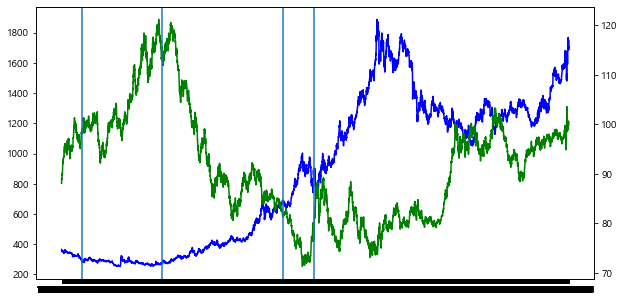

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(res["Date"], res["gold"], color = 'b')
ax2.plot(res["Date"],res["us-dollar-index"] , color = 'g')
plt.axvline(x='1997-12-15', label = '1997 외환위기 시작')
plt.axvline(x='2001-08-24', label = 'IMF 관리체계 종료')
plt.axvline(x='2007-04-27', label = '2007.04 서브프라임 시작')
plt.axvline(x='2008-09-26', label = '2008.04 리먼브라더스 파산')